<a href="https://colab.research.google.com/github/danielgomescruz/Meus_estudos/blob/main/Aula_8_DDS4_KNN_e_Arvores_de_Decisao_dgc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 8 - DDS4 - KNN e Árvores de Decisão**

## **Importação de Dados e Preparação dos Dados**

In [ ]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dados.count()[0]

1338

In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0}) #transformar categorico para numerico
dados['charges'] = dados['charges']/1000 #mudar a escala dos numeros
dados = dados[['bmi', 'smoker', 'charges']] #selecionar as colunas que quero trabalhar
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## **Upgrade na Técnica de Validação: _Holdout Repetido_**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import numpy as np

R = 1000 #quantidade de repeticoes dos testes
eqms = [] #lista dos erros quadraticos medios
maes = [] #lista dos erros medios absolutos

X = dados[['bmi']] #explicativa ou independente
y = dados['charges'] #resposta ou dependente

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    mae = np.mean(abs(yteste - preditos))
    eqms.append(eqm)
    maes.append(mae)
    
print(np.mean(eqms)) 
print(np.mean(maes)) #meu modelo esta errando em media, em absoluto, $5k, por ser ema

140.71184927095535
9.171376162516648


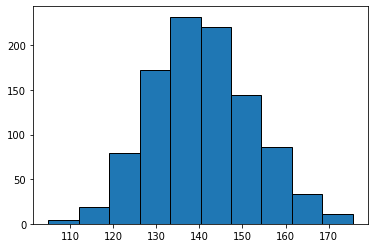

In [ ]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()

In [ ]:
print(np.mean(eqms) - 2 * np.std(eqms)) #intervalo de confianca superior
print(np.mean(eqms) + 2 * np.std(eqms)) #intervalo de confianca inferior

117.39606260216983
164.0276359397409


---

## **Modelo: K-Vizinhos Mais Próximos (K-NN)**

In [101]:
from sklearn.neighbors import KNeighborsRegressor

k = 7 #fazer iteracoes para descobrir o melhor k
R = 100 #tem muito custo computacional, pode levar dias

eqms_treino = [] #vou olhar os dois pra ver se esta tendo overfitting
eqms_teste = [] #e o que importa para comparar diferentes modelos

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k) #pegando k ali em cima
    knn.fit(Xtreino, ytreino) #ajustar nos dados de treino 

    preditos_treino = knn.predict(Xtreino) #previsao
    eqm_treino = mean_squared_error(preditos_treino, ytreino) #erro
    eqms_treino.append(eqm_treino) #lista

    preditos_teste = knn.predict(Xteste) #previsao
    eqm_teste = mean_squared_error(preditos_teste, yteste) #erro
    eqms_teste.append(eqm_teste) #lista
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 34.27
O Erro Quadrático Médio de TESTE  foi:  46.10


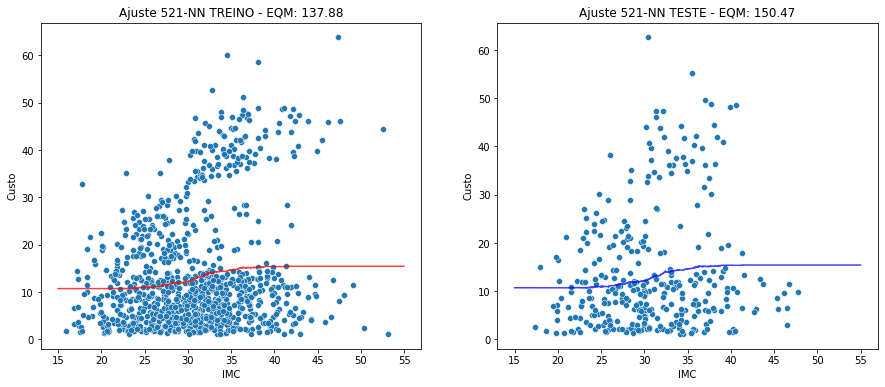

In [ ]:
# Gráfico do KNN com 1 Variável 

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()
#a curva fica igual ao do treinamento

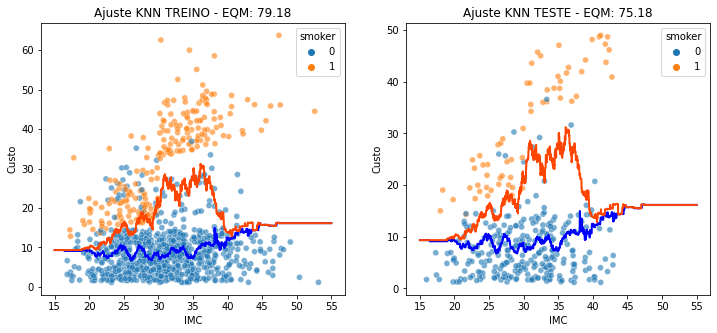

In [ ]:
# Gráfico do Modelo com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

k = 45 #k do tamanho do df, todo mundo e vizinho de todo mundo :(

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino) #faz como que o modelo aprenda o padrao e replique nos dados de teste

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

## **Árvores de Decisão**

In [ ]:
#tanto regressao quanto classificacao

from sklearn.tree import DecisionTreeRegressor

profundidade = 3
R = 100

eqms_treino = []
eqms_teste = []

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino) 

    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 33.20
O Erro Quadrático Médio de TESTE  foi:  34.50


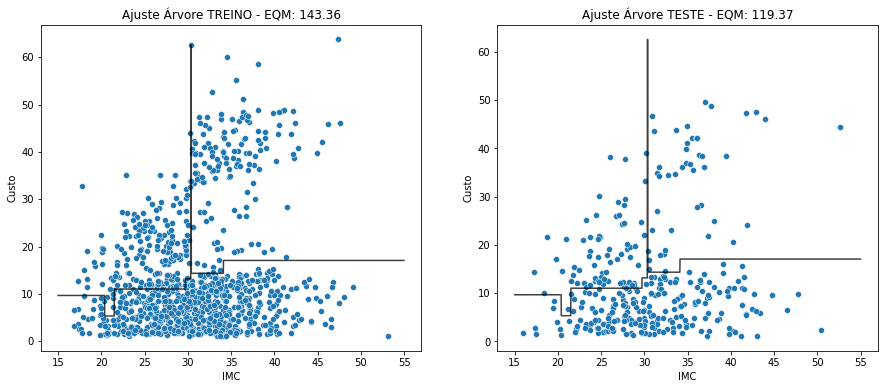

In [134]:
# Gráfico da Árvore com 1 Variável 

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

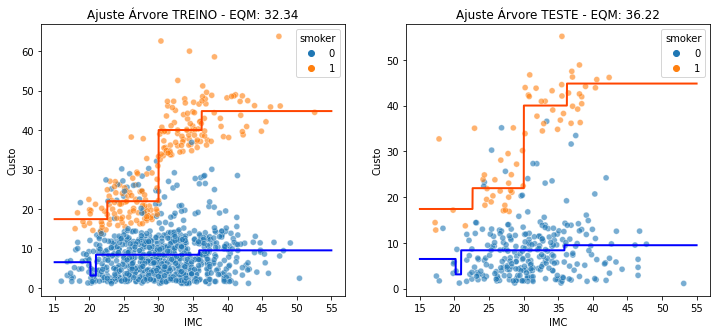

In [135]:
# Gráfico da Árvore com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

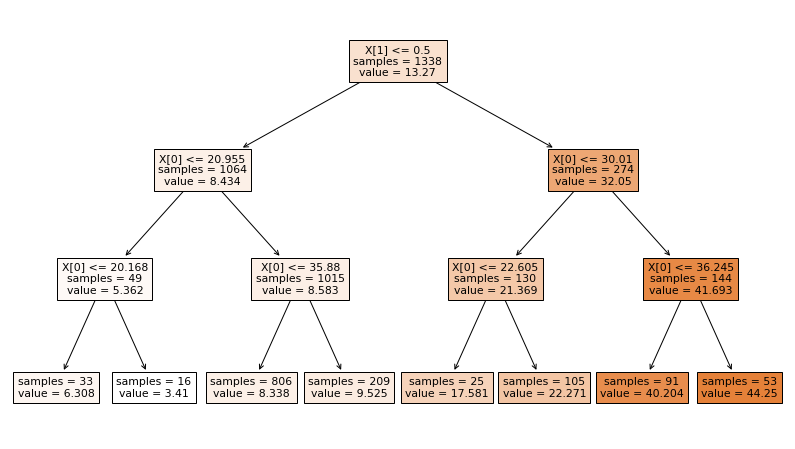

In [ ]:
# Gráfico da Árvore

from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(max_depth= profundidade)
arvore.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

---

## **Comparação dos Modelos**

In [103]:
def HoldoutRepetido_EQM(modelo, replicas = 50, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste 

In [104]:
HoldoutRepetido_EQM(modelo = LinearRegression())

EQM médio de TREINO: 50.21
EQM médio de TESTE: 50.03


(50.21, 50.03)

In [ ]:
HoldoutRepetido(modelo = KNeighborsRegressor()) #default k = 7

EQM médio de TREINO: 31.35
EQM médio de TESTE: 47.53


(31.35, 47.53)

In [ ]:
HoldoutRepetido(modelo = DecisionTreeRegressor())

EQM médio de TREINO: 15.55
EQM médio de TESTE: 57.74


(15.55, 57.74)

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 50.1
EQM médio de TESTE: 50.38
EQM médio de TREINO: 31.55
EQM médio de TESTE: 47.33
EQM médio de TREINO: 43.85
EQM médio de TESTE: 51.56
EQM médio de TREINO: 54.39
EQM médio de TESTE: 58.46
EQM médio de TREINO: 67.8
EQM médio de TESTE: 71.96
EQM médio de TREINO: 80.27
EQM médio de TESTE: 85.11
EQM médio de TREINO: 55.98
EQM médio de TESTE: 55.12
EQM médio de TREINO: 34.39
EQM médio de TESTE: 34.53
EQM médio de TREINO: 33.18
EQM médio de TESTE: 34.52
EQM médio de TREINO: 32.1
EQM médio de TESTE: 36.3
EQM médio de TREINO: 30.9
EQM médio de TESTE: 37.43


,EQM Treino,EQM Teste
Árvore - Prof = 3,33.18,34.52
Árvore - Prof = 2,34.39,34.53
Árvore - Prof = 4,32.10,36.30
Árvore - Prof = 5,30.90,37.43
KNN - K = 5,31.55,47.33
Regressão Linear,50.10,50.38
KNN - K = 15,43.85,51.56
Árvore - Prof = 1,55.98,55.12
KNN - K = 25,54.39,58.46
KNN - K = 35,67.80,71.96


---

## **Exercícios Propostos**




- Replique os experimentos e verifique se os melhores modelos se mantém, quando utilizamos o Erro Absoluto Médio ao invés do Erro Quadrático Médio.

In [ ]:
#agora utilizando o Erro Absoluto Medio (eam = np.mean(abs(real - observado)))

from sklearn.metrics import mean_absolute_error 


In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eams_treino = []
    eams_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eam no teste
        preditos_treino = reg.predict(Xtreino) 
        eam_treino = mean_absolute_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eam_teste = mean_absolute_error(yteste, preditos_teste)

        #Guardando o resultado
        eams_treino.append(eam_treino)
        eams_teste.append(eam_teste)
    
    res_treino = np.array(eams_treino).mean().round(2)
    res_teste = np.array(eams_teste).mean().round(2)

    print('EAM médio de TREINO: {}'.format(res_treino))
    print('EAM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste 

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EAM Treino': treinos, 'EAM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EAM Teste')

EAM médio de TREINO: 5.39
EAM médio de TESTE: 5.45
EAM médio de TREINO: 4.09
EAM médio de TESTE: 4.94
EAM médio de TREINO: 4.74
EAM médio de TESTE: 5.13
EAM médio de TREINO: 5.18
EAM médio de TESTE: 5.45
EAM médio de TREINO: 5.85
EAM médio de TESTE: 6.18
EAM médio de TREINO: 6.41
EAM médio de TESTE: 6.58
EAM médio de TREINO: 5.65
EAM médio de TESTE: 5.69
EAM médio de TREINO: 4.38
EAM médio de TESTE: 4.48
EAM médio de TREINO: 4.29
EAM médio de TESTE: 4.42
EAM médio de TREINO: 4.24
EAM médio de TESTE: 4.44
EAM médio de TREINO: 4.11
EAM médio de TESTE: 4.58


,EAM Treino,EAM Teste
Árvore - Prof = 3,4.29,4.42
Árvore - Prof = 4,4.24,4.44
Árvore - Prof = 2,4.38,4.48
Árvore - Prof = 5,4.11,4.58
KNN - K = 5,4.09,4.94
KNN - K = 15,4.74,5.13
Regressão Linear,5.39,5.45
KNN - K = 25,5.18,5.45
Árvore - Prof = 1,5.65,5.69
KNN - K = 35,5.85,6.18


---


- Encontre valores ótimos para o K do KNN e a profundidade da Árvores.

In [129]:
#Encontre valores ótimos para o K do KNN

lista_knn = []
treinos = []
testes = []

for k in range(1, 26):
  resultado = HoldoutRepetido_EQM(modelo = KNeighborsRegressor(n_neighbors = k)) 
  print('Esse resultado e para o k ={:.4f} '.format(k))
  lista_knn.append(k)
  treinos.append(resultado[0])
  testes.append(resultado [1])

aux = {'KNN': lista_knn,'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = lista_knn)
resultados.sort_values(by = 'EQM Teste')


EQM médio de TREINO: 31.02
EQM médio de TESTE: 74.98
Esse resultado e para o k =1.0000 
EQM médio de TREINO: 25.04
EQM médio de TESTE: 58.11
Esse resultado e para o k =2.0000 
EQM médio de TREINO: 27.32
EQM médio de TESTE: 50.77
Esse resultado e para o k =3.0000 
EQM médio de TREINO: 29.6
EQM médio de TESTE: 47.93
Esse resultado e para o k =4.0000 
EQM médio de TREINO: 31.04
EQM médio de TESTE: 47.56
Esse resultado e para o k =5.0000 
EQM médio de TREINO: 33.03
EQM médio de TESTE: 45.66
Esse resultado e para o k =6.0000 
EQM médio de TREINO: 34.14
EQM médio de TESTE: 46.45
Esse resultado e para o k =7.0000 
EQM médio de TREINO: 35.85
EQM médio de TESTE: 45.39
Esse resultado e para o k =8.0000 
EQM médio de TREINO: 37.11
EQM médio de TESTE: 48.18
Esse resultado e para o k =9.0000 
EQM médio de TREINO: 37.92
EQM médio de TESTE: 49.82
Esse resultado e para o k =10.0000 
EQM médio de TREINO: 39.61
EQM médio de TESTE: 47.77
Esse resultado e para o k =11.0000 
EQM médio de TREINO: 40.61
EQM 

,KNN,EQM Treino,EQM Teste
8,8,35.85,45.39
6,6,33.03,45.66
7,7,34.14,46.45
5,5,31.04,47.56
11,11,39.61,47.77
4,4,29.60,47.93
9,9,37.11,48.18
12,12,40.61,49.35
13,13,42.00,49.59
10,10,37.92,49.82


In [131]:
#encontre os valores otimos para a profundidade das arvores!!!

lista_tree = []
treinos = []
testes = []

for prof in range(1, 26):
  resultado = HoldoutRepetido_EQM(modelo = DecisionTreeRegressor(max_depth = prof))
  print('Esse resultado e para a profundidade ={:.4f} '.format(prof))
  lista_tree.append(prof)
  treinos.append(resultado[0])
  testes.append(resultado [1])

aux = {'Prof': lista_tree,'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = lista_tree)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 55.61
EQM médio de TESTE: 56.23
Esse resultado e para a profundidade =1.0000 
EQM médio de TREINO: 34.25
EQM médio de TESTE: 34.91
Esse resultado e para a profundidade =2.0000 
EQM médio de TREINO: 33.26
EQM médio de TESTE: 34.34
Esse resultado e para a profundidade =3.0000 
EQM médio de TREINO: 32.3
EQM médio de TESTE: 35.87
Esse resultado e para a profundidade =4.0000 
EQM médio de TREINO: 31.01
EQM médio de TESTE: 36.79
Esse resultado e para a profundidade =5.0000 
EQM médio de TREINO: 29.62
EQM médio de TESTE: 38.86
Esse resultado e para a profundidade =6.0000 
EQM médio de TREINO: 28.04
EQM médio de TESTE: 40.54
Esse resultado e para a profundidade =7.0000 
EQM médio de TREINO: 26.15
EQM médio de TESTE: 43.42
Esse resultado e para a profundidade =8.0000 
EQM médio de TREINO: 24.76
EQM médio de TESTE: 43.74
Esse resultado e para a profundidade =9.0000 
EQM médio de TREINO: 23.2
EQM médio de TESTE: 47.21
Esse resultado e para a profundidade =10.0000 
EQM médio d

,Prof,EQM Treino,EQM Teste
3,3,33.26,34.34
2,2,34.25,34.91
4,4,32.30,35.87
5,5,31.01,36.79
6,6,29.62,38.86
7,7,28.04,40.54
8,8,26.15,43.42
9,9,24.76,43.74
10,10,23.20,47.21
11,11,21.26,50.23
